# Natural Language Processing

## Exercise Sheet 2

In [4]:
#imports for all exercises
import matplotlib.pylab as plt
import nltk
from nltk.corpus import inaugural
from nltk.corpus import names 
from nltk.corpus import wordnet as wn
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.corpus import udhr

### Exercise 1

Plot the conditional frequency distribution of how the usage of the words "men", "women", and "people" has changed over time in the Inaugural Address Corpus.


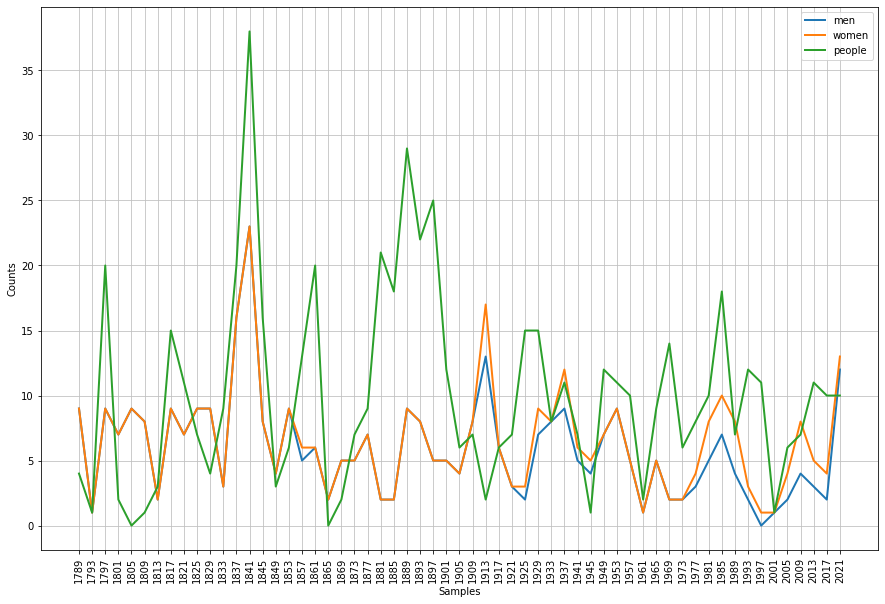

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
plt.rcParams["figure.figsize"] = [15,10]
target_words= ["men", "women", "people"]
cdf = nltk.ConditionalFreqDist((target, fileid[:4])
                              for fileid in inaugural.fileids()
                              for word in inaugural.words(fileid)
                              for target in target_words
                              if word.lower() in target)
cdf.plot()

### Exercise 2

Plot a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males vs. females.

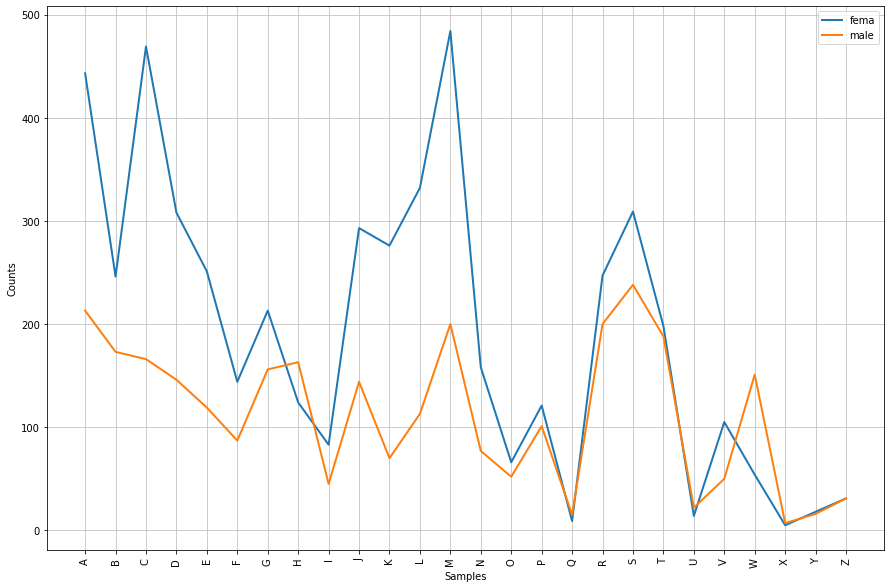

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
names =nltk.corpus.names
initials = nltk.ConditionalFreqDist((fileid[:4],w[0])
                       for fileid in names.fileids()
                       for w in names.words(fileid)
                       for letter in w[0])
initials.plot()

### Exercise 3

What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [34]:
all_synsets = set(wn.all_synsets('n'))
num_syns = len(all_synsets)
no_syns = len([w for w in all_synsets if len(w.hyponyms())==0])
print("Percentage of noun synsets without hyponyms:", round(no_syns/num_syns*100, 2))

Percentage of noun synsets without hyponyms: 79.67


### Exercise 4

Define a function `supergloss(s)` that takes a synset $s$ as its argument and returns a string consisting of the concatenation of the definition of $s$, and the definitions of all the hypernyms and hyponyms of $s$. Apply the function to the synset "car.n.01".

In [47]:
def supergloss(s):
    res = s.definition()
    nyms = s.hypernyms() + s.hyponyms()
    for nym in nyms:
        res = res + nym.definition()
    return res


In [48]:
supergloss(wn.synset("car.n.01"))

"a motor vehicle with four wheels; usually propelled by an internal combustion enginea self-propelled wheeled vehicle that does not run on railsa vehicle that takes people to and from hospitalsa car that has a long body and rear door with space behind rear seata car that is old and unreliablea car driven by a person whose job is to take passengers where they want to go in exchange for moneya small and economical cara car that has top that can be folded or removeda car with two doors and front seats and a luggage compartmenta car in which policemen cruise the streets; equipped with radiotelephonic communications to headquartersa car that is powered by electricitya car with relatively low fuel efficiencya car that resembles a convertible but has a fixed rigid topa car having a hatchback dooran early term for an automobilea car modified to increase its speed and accelerationa car suitable for traveling over rough terrainlarge luxurious car; usually driven by a chauffeura car that is lent 

### Exercise 5

Define a function to find all words that occur at least $n$ times in the Brown Corpus. Call the function with the value $n=200$.

In [7]:
def freq_words(n):
    vocab = [w.lower() for w in brown.words() if w.isalpha()]
    fdist = nltk.FreqDist(vocab)
    return [(w, fdist[w]) for w in set(vocab) if fdist[w] >= n]
    

In [8]:
freq_words(200)

[('example', 292),
 ('away', 456),
 ('to', 26158),
 ('position', 241),
 ('had', 5133),
 ('family', 331),
 ('anything', 280),
 ('business', 393),
 ('little', 831),
 ('though', 440),
 ('therefore', 205),
 ('began', 312),
 ('got', 482),
 ('behind', 258),
 ('three', 610),
 ('car', 274),
 ('done', 319),
 ('who', 2252),
 ('of', 36412),
 ('days', 384),
 ('through', 971),
 ('open', 318),
 ('with', 7289),
 ('see', 772),
 ('whole', 309),
 ('enough', 430),
 ('others', 323),
 ('help', 311),
 ('only', 1748),
 ('no', 2139),
 ('eyes', 401),
 ('your', 923),
 ('by', 5306),
 ('because', 883),
 ('true', 231),
 ('problems', 247),
 ('board', 239),
 ('some', 1618),
 ('used', 611),
 ('child', 213),
 ('could', 1601),
 ('a', 23195),
 ('probably', 261),
 ('and', 28853),
 ('room', 384),
 ('both', 730),
 ('new', 1635),
 ('any', 1344),
 ('are', 4394),
 ('following', 221),
 ('for', 9489),
 ('i', 5164),
 ('saw', 352),
 ('they', 3620),
 ('human', 299),
 ('at', 5372),
 ('clear', 219),
 ('then', 1380),
 ('called', 401)

### Exercise 6

Write a program that lists the lexical diversity scores for all Brown Corpus genres, one per line.


In [15]:
for category in brown.categories():
    num_words = len(brown.words(categories = category))
    num_vocab = len(set([w.lower() for w in brown.words(categories = category)]))
    print( round(num_words/num_vocab, 2), ":",  category)

8.37 : adventure
10.15 : belles_lettres
6.76 : editorial
7.89 : fiction
9.53 : government
7.61 : hobbies
4.56 : humor
11.75 : learned
8.23 : lore
8.85 : mystery
7.67 : news
6.64 : religion
5.04 : reviews
8.88 : romance
4.77 : science_fiction


### Exercise 7

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. Apply the function to the "news" genre of the Brown Corpus. 



In [25]:
def most_common(text):
    text_as_list = [w.lower() for w in text if w.isalpha()]
    #delete stopwords
    without_stopwords = [w for w in text_as_list if w not in stopwords.words('english')]
    fdist = nltk.FreqDist(without_stopwords)
    return fdist.most_common(50)

In [26]:
most_common(brown.words(categories="news"))

[('said', 406),
 ('would', 246),
 ('new', 241),
 ('one', 213),
 ('last', 177),
 ('two', 174),
 ('first', 158),
 ('state', 153),
 ('year', 142),
 ('president', 142),
 ('home', 132),
 ('also', 129),
 ('made', 107),
 ('time', 103),
 ('years', 102),
 ('three', 101),
 ('house', 97),
 ('week', 94),
 ('city', 93),
 ('may', 93),
 ('school', 87),
 ('could', 87),
 ('four', 82),
 ('day', 76),
 ('committee', 75),
 ('man', 74),
 ('members', 74),
 ('back', 73),
 ('government', 73),
 ('many', 72),
 ('national', 72),
 ('university', 70),
 ('bill', 69),
 ('get', 68),
 ('high', 68),
 ('work', 67),
 ('since', 67),
 ('american', 67),
 ('program', 66),
 ('kennedy', 66),
 ('night', 65),
 ('john', 65),
 ('board', 64),
 ('administration', 62),
 ('meeting', 62),
 ('county', 61),
 ('per', 61),
 ('even', 61),
 ('states', 60),
 ('tax', 58)]

### Exercise 8

Write a function that finds the 50 most frequently occurring bigrams of a text, omitting bigrams that contain stopwords. Apply the function to the "news" genre of the Brown Corpus. 


In [27]:
def most_common_bigrams(text):
    text_as_list = [w.lower() for w in text if w.isalpha()]
    #delete stopwords
    without_stopwords = [w for w in text_as_list if w not in stopwords.words('english')]
    #create bigrams
    text_bigrams = list(nltk.bigrams(without_stopwords))
    fdist = nltk.FreqDist(text_bigrams)
    return fdist.most_common(50)

In [28]:
most_common_bigrams(brown.words(categories="news"))

[(('new', 'york'), 52),
 (('per', 'cent'), 50),
 (('united', 'states'), 37),
 (('last', 'week'), 35),
 (('last', 'year'), 34),
 (('white', 'house'), 29),
 (('high', 'school'), 23),
 (('home', 'runs'), 23),
 (('president', 'kennedy'), 20),
 (('last', 'night'), 18),
 (('said', 'would'), 15),
 (('years', 'ago'), 15),
 (('san', 'francisco'), 15),
 (('premier', 'khrushchev'), 13),
 (('kansas', 'city'), 13),
 (('vice', 'president'), 12),
 (('los', 'angeles'), 12),
 (('united', 'nations'), 11),
 (('new', 'orleans'), 11),
 (('police', 'said'), 11),
 (('sales', 'tax'), 10),
 (('two', 'years'), 10),
 (('american', 'catholic'), 10),
 (('mantle', 'maris'), 10),
 (('jury', 'said'), 9),
 (('would', 'like'), 9),
 (('el', 'paso'), 9),
 (('social', 'security'), 9),
 (('kennedy', 'administration'), 9),
 (('first', 'time'), 9),
 (('country', 'club'), 9),
 (('rules', 'committee'), 9),
 (('air', 'force'), 9),
 (('tax', 'bill'), 9),
 (('grand', 'jury'), 8),
 (('city', 'council'), 8),
 (('rhode', 'island'), 

### Exercise 9

Write a function `word_freq()` that takes a word and the name of a Brown Corpus genre as arguments, and computes the frequency of the word in that section of the corpus. Use the function to compute the frequency of "love" in "news" vs. "romance" genre.

In [33]:
def word_freq(word, category):
    words_in_cat = [w.lower() for w in brown.words(categories=category)]
    fdist = nltk.FreqDist(words_in_cat)
    return  fdist[word] / len(words_in_cat) * 100

In [36]:
print("Category News: ", word_freq("love", "news"), "%")
print("Category Romance: ", word_freq("love", "romance"), "%")

Category News:  0.002983471567515962 %
Category Romance:  0.05141241324155266 %


### Exercise 10

Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the Universal Declaration of Human Rights Corpus and limit your searches to files in the Latin-1 encoding. Use the function to find the languages for the string "basis".


In [48]:
def find_language(word):
    langs_latin_1 = [w for w in udhr.fileids() if "Latin1" in w[-7:]]
    res = [lang[:-7] for lang in langs_latin_1 if word in udhr.words(lang)]
    return res

In [49]:
find_language("basis")

['Afrikaans', 'English']

### Exercise 11

What is the branching factor of the noun hypernym hierarchy, i.e. for every noun synset that has hyponyms, how many do they have on average? 

In [53]:
num_of_hyponyms = [ len(synset.hyponyms()) for synset in wn.all_synsets('n') if len(synset.hyponyms()) > 0]
round(sum(num_of_hyponyms) / len(num_of_hyponyms), 2)

4.54